I will start by quoting Wikipedia on this 

" Tennis is a racquet sport that can be played individually against a single opponent (singles) or between two teams of two   players each (doubles). Each player uses a racquet that is strung with cord to strike a hollow rubber ball covered with felt over or around a net and into the opponent's court. The object of the game is to play the ball in such a way that the opponent is not able to play a good return. The opponent who is unable to return the ball will not gain a point, while the opposite opponent will" 
                                                                                                     --- Wikipedia                                                                                            

A game of tennis encompasses a myriad of skills and qualities. Even then, the nature of sport accomodates fair number of suprises here and then. I will be using the men's performance data from French Open,2013.

We will start by loading the data set and taking a peak at its top to hang around the intricacies of data. 

In [4]:

#Set Directory to location of data file
setwd("C:/Users/Abhinav/Desktop/Artoo")

# Read the file
Data <- read.csv("FrenchOpen-men-2013.csv")

#Take a peak at the few upper rows
head(Data)

#Get a summary of data
summary(Data)


,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,ellip.h,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
1,Pablo Carreno-Busta,Roger Federer,1,0,0,3,62,27,38,11,<8b>,7,7,14,18,88,6,6,6,NA,NA
2,Somdev Devvarman,Daniel Munoz-De La Nava,1,1,3,0,62,54,38,22,<8b>,1,16,22,25,106,3,3,5,NA,NA
3,Tobias Kamke,Paolo Lorenzi,1,1,3,2,62,53,38,15,<8b>,10,18,19,27,139,3,3,6,6,3
4,Julien Benneteau,Ricardas Berankis,1,1,3,1,72,87,28,19,<8b>,4,13,33,43,149,6,3,7,6,NA
5,Lukas Lacko,Sam Querrey,1,0,0,3,52,31,48,22,<8b>,4,7,12,13,93,6,6,6,NA,NA
6,Jan Hajek,Denis Kudla,1,1,3,1,70,58,30,18,<8b>,1,7,6,9,93,2,7,0,4,NA


               Player1              Player2       Round           Result     
 Novak Djokovic    : 6   David Ferrer   : 6   Min.   :1.000   Min.   :0.000  
 Rafael Nadal      : 6   Roger Federer  : 5   1st Qu.:1.000   1st Qu.:0.000  
 Jo-Wilfried Tsonga: 5   Kei Nishikori  : 4   Median :1.000   Median :0.000  
 Gilles Simon      : 4   Nicolas Almagro: 4   Mean   :1.952   Mean   :0.472  
 Stanislas Wawrinka: 4   Richard Gasquet: 4   3rd Qu.:2.000   3rd Qu.:1.000  
 Tommy Haas        : 4   Fabio Fognini  : 3   Max.   :7.000   Max.   :1.000  
 (Other)           :96   (Other)        :99                                  
     FNL.1           FNL.2          FSP.1          FSW.1           SSP.1     
 Min.   :0.000   Min.   :0.00   Min.   :43.0   Min.   :10.00   Min.   :16.0  
 1st Qu.:0.000   1st Qu.:1.00   1st Qu.:58.0   1st Qu.:35.00   1st Qu.:31.0  
 Median :2.000   Median :2.00   Median :64.0   Median :45.00   Median :36.0  
 Mean   :1.728   Mean   :1.84   Mean   :63.6   Mean   :48.62   M

There are a few NA values present in the different features, DBF.1 and DBF.2, can be explained as they mean: the corresponding player didn't have any doubles fault in that match. Also, games wrapped up in 3-4 sets would have set 4,5 and 5th as NA. 

As of now, we know that, Data has 125 rows with 42 vairables : each column incorporating a piece of information about the 125 games played. A grand slam typically involves participation of 128 players, which should result in 127 games. A quick count of the various rounds involved shows : 

In [5]:

# Gives the count of different rounds
table(Data$Round)



 1  2  3  4  5  6  7 
63 31 16  8  4  2  1 

Round 1 and Round 2 are short of 1 game each, this is possible when a player withdraws from a game due to expected circumstances. An ill-timed injury and so on . To get a better sense of data and build a picture of how the touranment progressed, a graph of the progression would help. Before we get to graph, I would like to add a few features to ease the process and to be able represent data better. 

In [6]:

# Add empty Winner and loser features and give them the size same as the number of rows of Data
n <- nrow(Data)
Data$Winner <- character(n)
Data$Loser <- character(n)

# If Result = 0, then player2 is winner 
# If Result = 1, then player1 is winner
Data$Winner[Data$Result==0] <- as.character(Data$Player2[Data$Result==0])
Data$Winner[Data$Result==1] <- as.character(Data$Player1[Data$Result==1])

# If Result = 1, then player2 is loser
# If Result = 0, then player1 is loser
Data$Loser[Data$Result==0] <- as.character(Data$Player1[Data$Result==0])
Data$Loser[Data$Result==1] <- as.character(Data$Player2[Data$Result==1])

# Feature TGP is an acronym for Total Games Played
# Obtained by summing the number of games played by each player 1 and 2.
Data$TGP <- Data$FNL.1+Data$FNL.2

# Vertices is a feature to get an ID for each row. It goes from 1 to number of rows : ie from 1 to 125
Data$Vertices <- 1:n


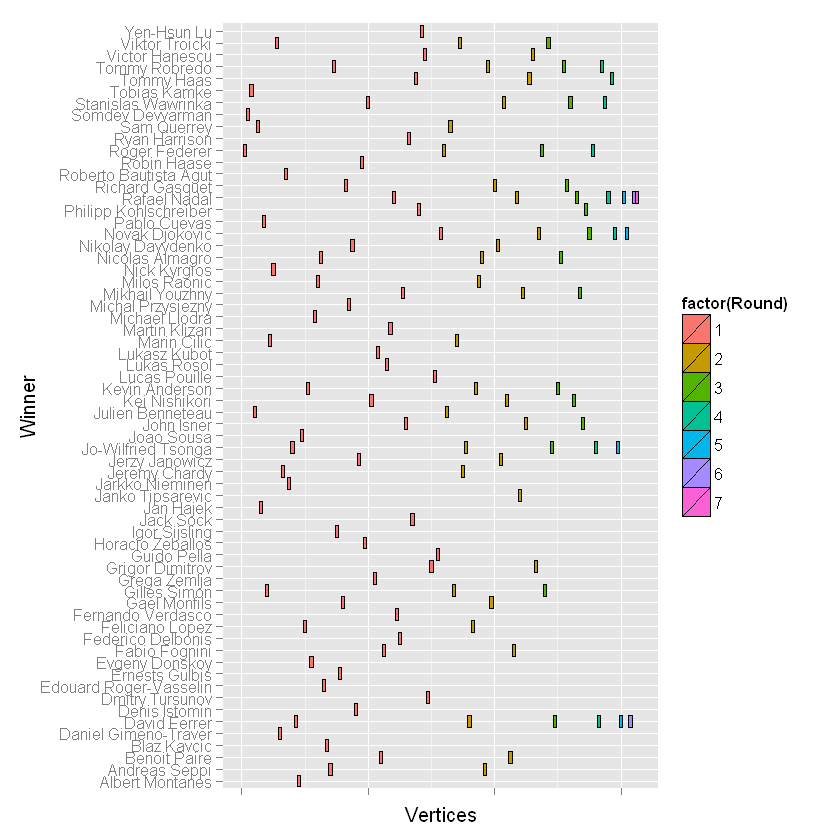

In [7]:

# Load ggplot2
library(ggplot2)
# The plot would make use of geom_tile function.
# theme would help make some changes to graph properties
# geom_test would be used for labelling losing players

# Put the data and 
ggplot(
    # name of Data set being used for plot
    Data,
    # aes or aesthetics of the plot
    # x axis will have Vertices
    # On the y axis we will have the Winners 
    aes(x=Vertices,y=Winner)) + 

# Add the geom_tile layer over the base plot
geom_tile(
    # aes : we will be filling the tiles with color on the basis of the Round being played.
    # Different round would have different colur : 7 colours for 7 Rounds
    aes(fill = factor(Round)),
    # outline the boxes with colour black
    colour = "black") + 

# This would eliminate the labelling on the X-axis
theme(axis.text.x=element_blank()) 

# Below code is optional 
# It adds extra lablleing,in this notebook, it looks cluttered:so dropped
# Y-axis will have winners
# The tile box would have the loser labelled
# Add a '+' before extending code
#geom_text(
    # aes : labelling will be that of the loser
    # aes(label=Loser,    
    # angle of tilt for the anchor. Anchor is the point about which the label is plotted
    # angle of zero means horizontal labelling, no tilt. Goes from 0 to 360     
    # angle=0,size=1,    
    # hjust and vjust are used to adjust the anchor. Default being 0.5 and 0.5    
    # hjust=0.5,vjust=-1))


The above graph can be used as look up table. We can easily figure out the ones who went further up. An extra piece of code adds lablel of the losing player. This would help know the matches a player played on the way to towards the next rounds. We know now that Rafael Nadal won the Grand Slam, as the row corresponding to him shows him winning 7th round. The players are arranged in a reverse alphabetical order from the top. The y axis has the list of only the winning 31 players as they won atleast one round.

Tennis is a game of skill, one of the skills and something that everyone longs to watch from a game of tennis is the player's ability to hit winners. Winners are shots which the opponent has no answer to or ones which he is not able to return back to opponent's court. A good player is able to hit winners at ease and they can be used to act as a predictor of match result. However, an attempt to hit many winners can often result in unforced errors, this is detrimental as the opponent tends to gain a point of out of it. 

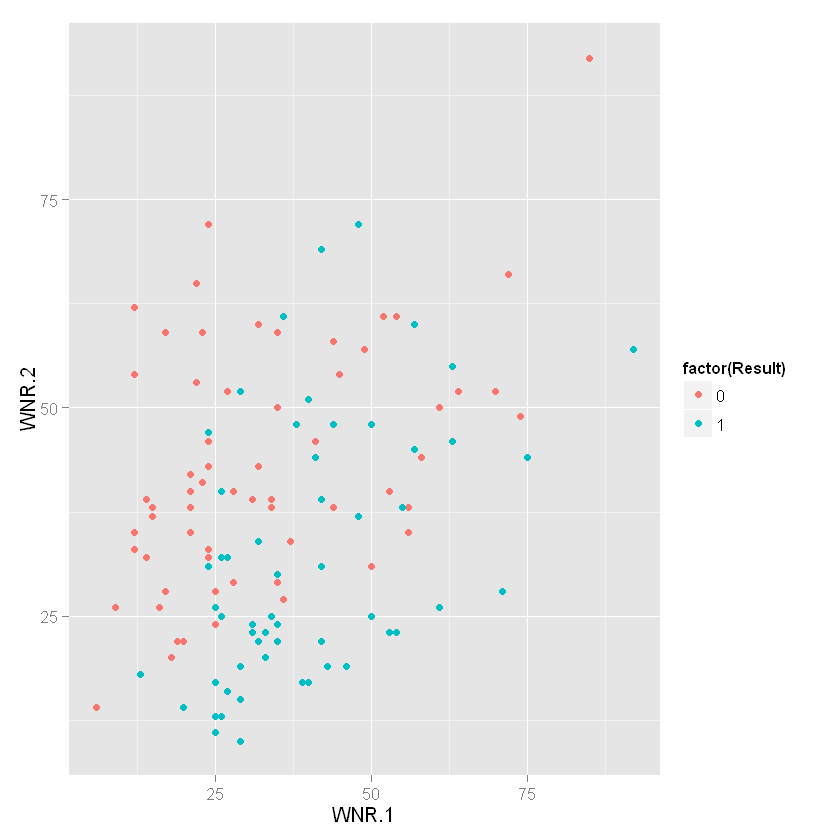

In [8]:

# Simple plot of number of winners hit 
# Each point represents a match.
# Points are coloured on basis of Result
# Result = 1, player1 won. Result=0, player2 won
# x axis = Winners hit by player1
# y axis = Winners hit by player2
ggplot(Data,aes(x=WNR.1,y=WNR.2)) +

# geom_point being used. 
# aes : color of point decided on the basis of Result, 0 and 1 have different colors.
geom_point(aes(color=factor(Result)))


Winners while a good measure don't seem to be doing very well to predict the result. In the graph above a player hit around 25 against 50 from opponent and yet went on to win the match. We will make another similar plot but this time we will be using a new feature for doing the same. We will be using ratio of winners to unforced errors as a predictor of outcome.

Hypothesis One : Player having the better ratio of winners to Unforced errors, should have won the match. 


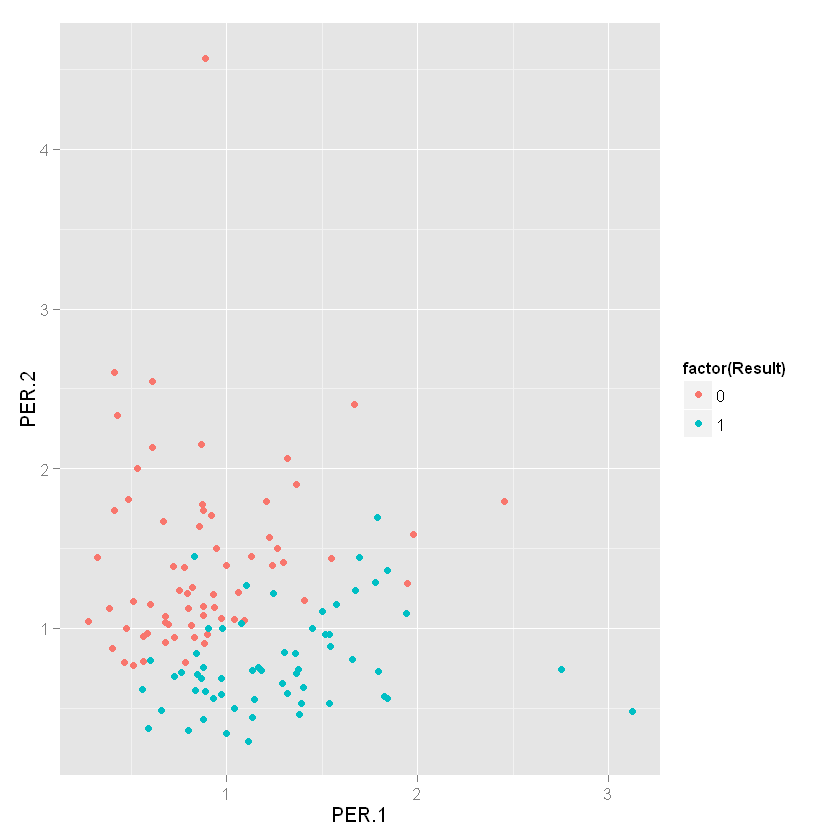

In [9]:

# The two new features PER.1 and PER.2 introduced
# Percision to Error Ratio 
Data$PER.1 <- Data$WNR.1/Data$UFE.1
Data$PER.2 <- Data$WNR.2/Data$UFE.2

# Data and the new features : PER.1 and PER.2
# x axis : PER.1, ratio representing player1
# y axis : PER.2, ratio representing player2
ggplot(Data,aes(x=PER.1,y=PER.2)) + 

# Points to be colored on the basis of outcome
# Result = 1, player 1 won
# Result = 0, player 2 won
geom_point(aes(color=factor(Result)))


As can be seen, the new ratio makes a better job of predicting the outcome of match. Its not the absolute number of winner hit but the precision with which a player makes a shot that counts. A logical explanation is, a player hitting more winner to Unforced errors in comaparison to opponents is in better touch and thus logically : he should have the upper hand in the match. 

In [10]:

# New Data Set being created
# Columns 3,4,47,48 selected
# All rows selected
DataPOI <- Data[,c(3,4,47,48)]

# New feature pred being calculated
# -1 represnts player 2 has higher ratio
# 1 represents player 1 has higher ratio
DataPOI$Pred <- sign(Data$PER.1-Data$PER.2)

# Predicted values tabulated against original result 
table(DataPOI$Pred,DataPOI$Result)

#Accuracy of prediction
(60+52)/(125)


    
      0  1
  -1 60  7
  1   6 52

[1] 0.896

We get a reasonble accuracy out of this naive thinking. Since we defined the ratio as a skill of a player, the ratio should remain constant throught tournament or should show very little deviation. We will see how Rafael Nadal's skill defined as ratio of winners to Unforced errors spans out as he progresses through the rounds.

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,ellip.h,ST2.2,ST3.2,ST4.2,ST5.2,Winner,Loser,TGP,Vertices,PER.1,PER.2
48,Rafael Nadal,Daniel Brands,1,1,3,1,84,74,16,12,<8b>,6,4,3,NA,Rafael Nadal,Daniel Brands,4,48,1.538462,0.9622642
87,Rafael Nadal,Martin Klizan,2,1,3,1,74,55,26,10,<8b>,3,3,3,NA,Rafael Nadal,Martin Klizan,4,87,0.9310345,0.5614035
106,Rafael Nadal,Fabio Fognini,3,1,3,0,78,52,22,14,<8b>,4,4,NA,NA,Rafael Nadal,Fabio Fognini,3,106,0.6,0.7966102
116,Rafael Nadal,Kei Nishikori,4,1,3,0,69,39,31,16,<8b>,1,3,NA,NA,Rafael Nadal,Kei Nishikori,3,116,0.8,0.3589744
121,Rafael Nadal,Stanislas Wawrinka,5,1,3,0,75,40,25,11,<8b>,3,1,NA,NA,Rafael Nadal,Stanislas Wawrinka,3,121,1.823529,0.575
124,Novak Djokovic,Rafael Nadal,6,0,2,3,67,76,33,30,<8b>,3,6,6,9,Rafael Nadal,Novak Djokovic,5,124,0.72,1.386364


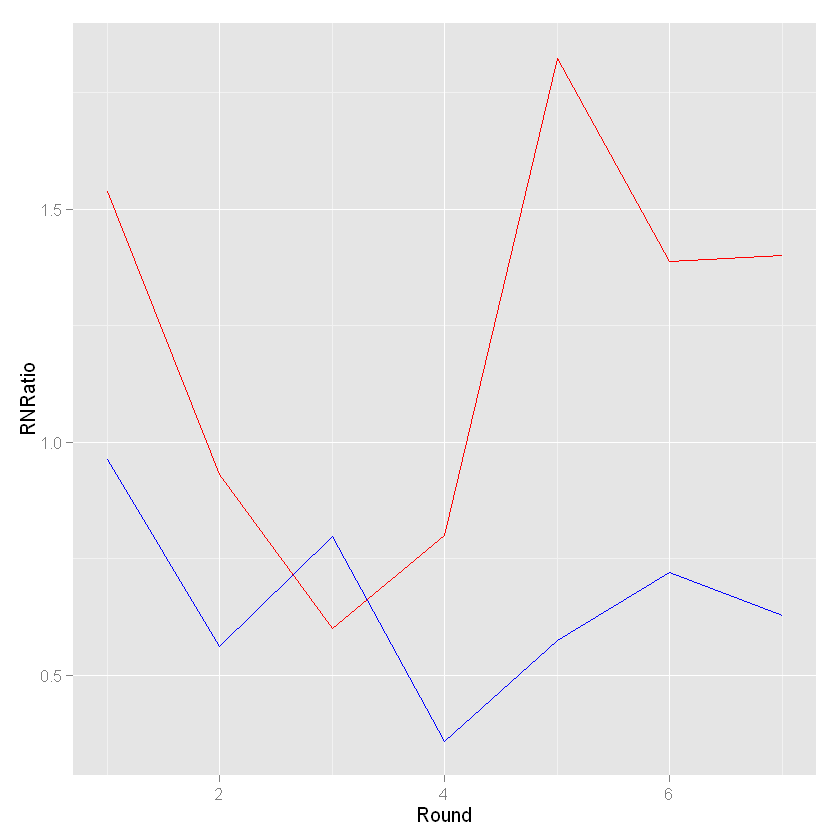

In [11]:

# Take a subset of Data, new Data Set called DataRN
# Only those rows, where Winner is Rafael Nadal 
DataRN <- Data[Data$Winner=="Rafael Nadal",]

#Take a peek at Data
head(DataRN)

# Except Round6, player1 is always Rafael Nadal
# We make new features RNRatio and OppRatio
# RNRatio has PER ratio for Rafael Nadal 
# OppRatio has the PER ratio for opponent players

# Copy PER.1
DataRN$RNRatio <- DataRN$PER.1

# Make the change where player 2 is Rafael
DataRN$RNRatio[6] <- DataRN$PER.2[6]

# Copy PER.2
DataRN$OppRatio <- DataRN$PER.2

# Make the change where Player 2 is Rafael
DataRN$OppRatio[6] <- DataRN$PER.1[6]

# Plotting Rafael and his opponent's Winner to Unforced Error Ratios
# We can see Rafael's progress as he progresses along the round
# x axis: Round 
ggplot(DataRN,aes(x=Round)) + 

# Rafael Nadal
# y aixs we have the Ratio
geom_line(aes(y=RNRatio),color="red") + 

# Opponents
# y axis, we have the ratio 
geom_line(aes(y=OppRatio),color="blue")


Rafale's performace is far from being a constant value, his skill varies as he plays against different opponents. This is because a players ability to hit winners is not independent of his opponent. Against a weak opponent, a competent player can hit more winners as the opporunity to do so would be given to him more often by a weak player than a stronger one. Also this prediction of ours ain't really much of prediction. We are using data from the very match to figure out the outcome. However they are useful when trying to figure out how the two players perform when paired against each other. Apparent from above graph, Rafael's game is better against certain players than others. He might fare better against certain better ranked players than the weaker ones. 

- Nadal's 3rd Match was against Fognini, their ratios were very close. Interestingly, since French Open 2013, they met 6 time more. Nadal and Fognini took the spoils three time each : Nadal(PER = 0.6000000), Fognini(PER = 0.7966102)

- Nadal met Kei Nishikori in Round 4, since then Nadal won twice and Kei once : Nadal(PER = 0.8000000),Kei(PER = 0.3589744)

- Nadal and Stanislas Wawrinka in Round 5, since then Nadal 3 times, rest Stanislas : Nadal(PER = 1.8235294),Stanislas(PER =    0.5750000) 

The point is this feature on its own can be a good predictor of outcome for a head to head match. While ratings measure general purpose skill of player. Comparison of this ratio incorporates the intricate game play between the two players. 

Way forward : Get a head to head stat of certain players, see how effective predictor is averaged PER from previous encounters. Hunch is this is a better feature than ratings.  

A drop and improve in performance can be due to multiple factors: confidence on winning a good game, might boost a player's confidence and improve his skills including the ratio PER. One interesting factor in a player's performace might be fatigue. 

Hypothesis Two : A 5 setter game tires a player enough, that the fatigue from the match would reduce the chances of winning his next match.  

In [12]:

# Subset Data into a new Data Set with only 5 set matches
Data5Setter <- Data[Data$TGP==5,]

# Get rounds, Winner and Loser columns
Data5Setter <- Data5Setter[,c(3,43,44)]
Data5Setter

# Run a loop from 1 to length of Data5Setter
for(i in 1:nrow(Data5Setter))
{
  # Obtain index of original Data Set 'Data' where winner of 'Data5Setter' matches with loser of 'Data'   
  index <- grep(Data5Setter$Winner[i],Data$Loser)
  # If index is non empty then length != 0   
  if(length(index!=0))
  {
    # New Colum Winner Last Round
    # This column contains the last round played by winner of a 5 setter.
    # Every player who won a 5 setter will have the maximum round he went up to  
    Data5Setter$WLR[i] <- Data[index,3]
  }  
}


,Round,Winner,Loser
3,1,Tobias Kamke,Paolo Lorenzi
7,1,Pablo Cuevas,Adrian Mannarino
8,1,Gilles Simon,Lleyton Hewitt
12,1,Daniel Gimeno-Traver,Juan Monaco
15,1,Jarkko Nieminen,Paul-Henri Mathieu
18,1,Albert Montanes,Steve Johnson
28,1,Andreas Seppi,Leonardo Mayer
32,1,Gael Monfils,Tomas Berdych
62,1,Guido Pella,Ivan Dodig
65,2,Julien Benneteau,Tobias Kamke


Now we know when a player won a 5 setter and the maximum round up to which he was able to progress. According to the hypothesis, fatigue from a 5 setter should reduce a players chance of winning his next match. If two many players lose their next match after having played a 5 setter, then it could be said that hypothesis holds. 

In [13]:

# Assumption is that probility of a match being won by each player is equal
# So the test is similar to running a 22 coin toss.
# We got 7 or less heads on toss or only 7 or less wins were recorded by 5 set winners in their next matches
# We are checking if the distribution is normal or anamoulous.  
# Null here is results are due to reasons other than fatigue due to 5 sets.
binom.test(7,22,0.5,alternative="less")



	Exact binomial test

data:  7 and 22
number of successes = 7, number of trials = 22, p-value = 0.0669
alternative hypothesis: true probability of success is less than 0.5
95 percent confidence interval:
 0.0000000 0.5154567
sample estimates:
probability of success 
             0.3181818 


p-value we got is 0.0669, not small enough to reject null for a 95% Confidence Interval. Even then, the phenomenon is worth exploring. Instead of using 0.5 as probability of winning for each either party, more accurate probabilities of winning or losing need to be used. Maybe use the Elo rating. Then run the test. As of now, there ain't much of evidence suggesting that a fatigue from a 5 setter would impact next match adversely. 

Better Way : Take average PER for both players from previous head to head encounters, predict their probability of winning on current match. If the PER of a player after having played a 5 setter is below par and it is statitiscally significant. We will be able to evaluate things better. 

Besides the ability to hit shots, ability to serve well is considered to be a remarkable asset. French Open is played on clay surface, which is considered to be slower than other surfaces. A good serve has speed and direcction. Speed is dampened at French Open.

Hypothesis Three : Serving  and Serve related attributes account for very little importance in French Open. Hard hitting, aggression and shots from base line are more important.

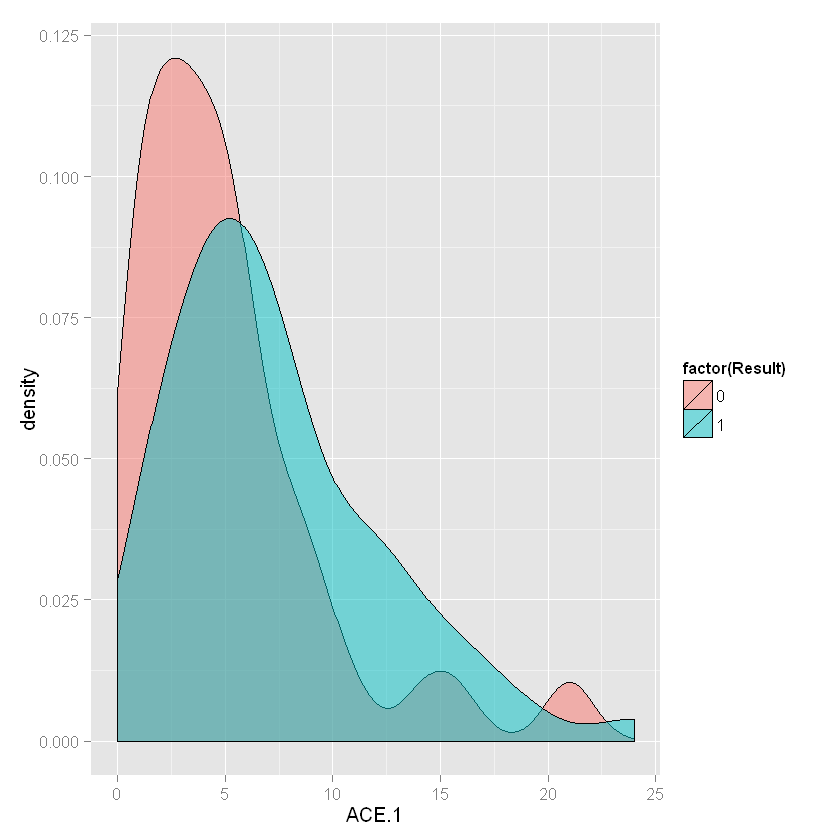

In [14]:

# Plotting  a density plot. 
# x-axis : Number of ACEs hit by player 1
# y-axis : Results obtained by the player
# Result 1 : Player 1 won
# Result 0 : Player 2 won
ggplot(Data, aes(x=ACE.1, fill=factor(Result))) + 

#Density layer over the base layer. 
#binwidth , alpha taken as these
#Position is default
geom_density(binwidth=5, alpha=.5, position="identity")


As seen above, most of the matches invovled the player hitting not many ACEs. This goes with our assumption that French Open is not known for extra-ordinary serving. To ensure parity. We will make a similar plot for player 2 one's as well. 

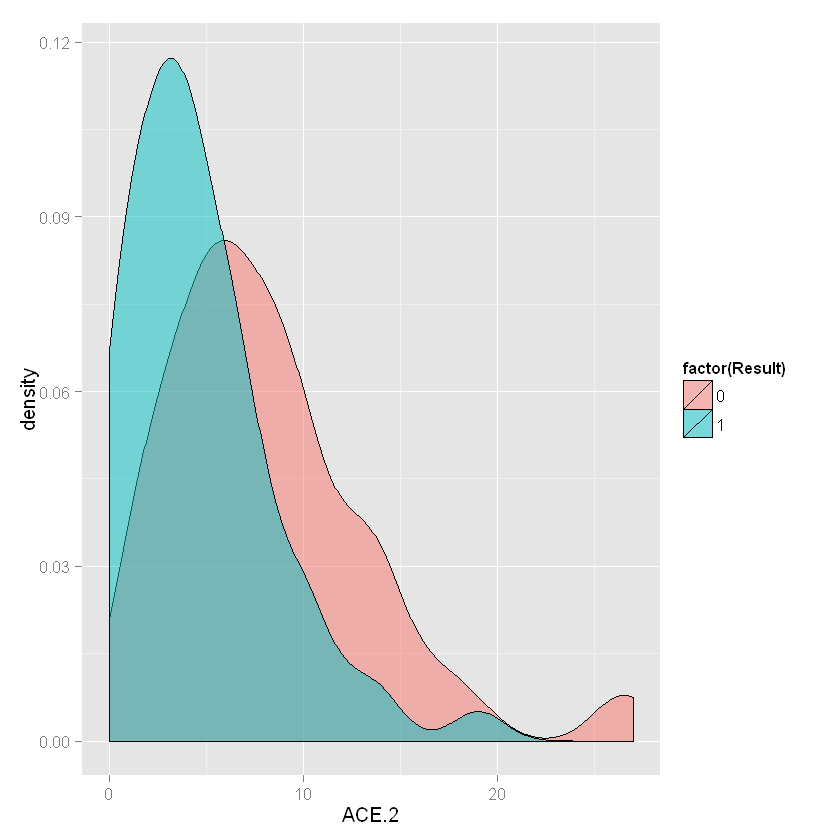

In [15]:

# Plotting  a density plot. 
# x-axis : Number of ACEs hit by player 2
# y-axis : Results obtained by the player
# Result 1 : Player 1 won
# Result 0 : Player 2 won
ggplot(Data, aes(x=ACE.2, fill=factor(Result))) + 

#Density layer over the base layer. 
#binwidth , alpha taken as these
#Position is default
geom_density(binwidth=5, alpha=.5, position="identity")


Though winnning players are hitting many aces, both graphs show : That a winning player is in most cases able to conjure up around 5 aces. The loser on the other hand manages a couple less than him. To check for the importance a logistic regression model will be build. 

As of now we know that PER or Performance to Error Ratio which is essentially : Winners to Unforced Error ratio for a player is a great predictor of the outcome. A player with a better head to head ratio, would have won the match. 

We will build two logistic regression models : One will have just the player and his opponent's ratio
Second one will have even the number of ACEs hit as a predictor. 
- Model will be build from the Player 1 perspective.
- Result 1 : He wins else loses
- We will see how the four predictors : 
- ACE.1 : Aces hit by player 
- ACE.2 : Aces hit by opponent
- PER.1 : Winner to Unforced Error ratio of player
- PER.2 : Winner to Unforced Error ratio of opponent
- Result : Dependent Variable

In [16]:

# Take a subset of data with only ACEs and PER ratios
NewData <- Data[,c(4,11,29,46,47,48)]

# Take a peek
head(NewData)

# Convert Result to factor : Important when building model
# Needs to convey to the model that 0 and 1 mean classes not numerals
NewData$Result <- as.factor(NewData$Result)

# To Ensure there is equal representation for winning and losing scenario in training data.
# This will ensure the model isn't biased towards one outcome.
# We will split Data into two parts, those having losing cases.
# Those having winning cases.
Data0 <- NewData[NewData$Result==0,]
Data1 <- NewData[NewData$Result==1,]


# Will sample 40 id values from losing case
# Will sample 40 id values from winning case
x <- sample(Data0$Vertices,40)
y <- sample(Data1$Vertices,40)

# Build a Train Data from 80 cases
Train <- rbind(NewData[x,],NewData[y,])

# Build Test Data from remaining cases
total <- c(x,y)
Test <- rbind(NewData[-total,])

,Result,ACE.1,ACE.2,Vertices,PER.1,PER.2
1,0,1,10,1,0.4137931,1.736842
2,1,7,0,2,1.3,0.8510638
3,1,4,6,3,0.7636364,0.7222222
4,1,14,13,4,1.777778,1.285714
5,0,4,10,5,0.875,1.135135
6,1,4,5,6,0.9722222,0.5882353


Two generalized linear models will be built. The two will be compared. 

In [18]:
# First Logitic Regression Model 
# Has PER.1 and PER.2 as predictors
# Binomial tells that we are building logistic instead of linear regression
Model1 <- glm(Result~PER.1+PER.2,data=Train,family="binomial")

# Summary of Model
# The stars are a point of interest: They let us know if a predictor is important or not(Varying level of significance)
# AIC Value : Measures relatve importance of different models.
# Can be used to figure out over-fitting 
summary(Model1)


Call:
glm(formula = Result ~ PER.1 + PER.2, family = "binomial", data = Train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2401  -0.3319   0.0043   0.3733   2.8488  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)    2.740      1.389   1.973 0.048488 *  
PER.1          4.705      1.298   3.625 0.000289 ***
PER.2         -7.379      1.814  -4.069 4.72e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 110.904  on 79  degrees of freedom
Residual deviance:  43.433  on 77  degrees of freedom
AIC: 49.433

Number of Fisher Scoring iterations: 7


The AIC value for this model is 49.33, both the predictors are important. This was on expected lines as we had already seen. 
We will now extend the model by adding the ACE parameters. 

In [19]:
# Model 2 has all four predictors inculding number of ACEs
Model2 <- glm(Result~PER.1+PER.2+ACE.1+ACE.2,data=Train,family="binomial")

# summary of Model2 
summary(Model2)


Call:
glm(formula = Result ~ PER.1 + PER.2 + ACE.1 + ACE.2, family = "binomial", 
    data = Train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.64629  -0.23099   0.00007   0.17784   2.53417  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.3212     1.6272   0.812 0.416810    
PER.1         7.7765     2.2450   3.464 0.000532 ***
PER.2        -6.5176     2.0283  -3.213 0.001312 ** 
ACE.1         0.1366     0.1097   1.245 0.213070    
ACE.2        -0.4374     0.1588  -2.755 0.005870 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 110.904  on 79  degrees of freedom
Residual deviance:  30.625  on 75  degrees of freedom
AIC: 40.625

Number of Fisher Scoring iterations: 8


The second model has a better fit as far as AIC value is concerned. Also it makes an intuitve sense to some sense. Serving is an important component of the game but even then their contribution to winning is way less than solid hitting and placement. 

In [21]:
# Predicting outcome from models
# pred will have the probability values for test cases
pred <- predict(Model1,Test,type="response")

# We cut-off at 0.5 
# pred > 0.5 : Won 
# pred < 0.5: Lost
pred <- sign(pred-0.5)
pred[pred==-1] <- 0

# tabulate results against the original outcomes
table(pred,Test$Result)

41/45

    
pred  0  1
   0 24  2
   1  2 17

[1] 0.9111111

Model1 has the accuracy of roughly 0.92

In [23]:
# Predicting outcome from models
# pred will have the probability values for test cases
pred <- predict(Model2,Test,type="response")

# We cut-off at 0.5 
# pred > 0.5 : Won 
# pred < 0.5: Lost
pred <- sign(pred-0.5)
pred[pred==-1] <- 0

# tabulate results against the original outcomes
table(pred,Test$Result)

39/45

    
pred  0  1
   0 22  2
   1  4 17

[1] 0.8666667

Model2 has an accuracy of roughly 0.87. Well after all serves don't seem to impact the game much.Our hypothesis of Serving not being a major component holds. To further check for the robustness, we should incorporate other Serve related features as well : Double Faults count, First Serve percentage etc. These we not used in the above case because their density graphs weren't compelling enough to include them in the model. 

In short : Tennis being played at French Open favours a certain kind of game play. On any given day, one who is hitting the ball accurately should be able to go on to win. 

PER is a good predictor of outcome for a particular head to head tie. If we know the value of ratio from previous encounters. We would be able to predict the outcome of present encounter. 

With this I bring an end to the analysis. Hope, I was able to communicate the flow properly and that it was not boring if not an interesting way to spend a few minutes. 

Thank You !!